In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pit
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

In [83]:

train_data = train_data.drop(columns=['Ticket', 'Fare', 'Cabin', 'Embarked'])
test_data = test_data.drop(columns=['Ticket', 'Fare', 'Cabin', 'Embarked'])
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())  
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())  

train_data['Sex'] = train_data['Sex'].map({'male': 1, 'female': 0})
test_data['Sex'] = test_data['Sex'].map({'male': 1, 'female': 0})

sex_survival = train_data.groupby('Sex')['Survived'].value_counts().unstack().fillna(0)
print("Sex-wise Survival/Death Count:")
print(sex_survival)


Sex-wise Survival/Death Count:
Survived    0    1
Sex               
0          81  233
1         468  109


In [84]:
bins = [0, 18, 30, 40, 50, 60, 100] 
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61+']  
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=bins, labels=labels, right=False)

age_survival = train_data.groupby('AgeGroup')['Survived'].value_counts().unstack().fillna(0)
print("\nAge-wise Survival/Death Count:")
print(age_survival)



Age-wise Survival/Death Count:
Survived    0    1
AgeGroup          
0-18       52   61
19-30     301  147
31-40      94   73
41-50      55   34
51-60      28   20
61+        19    7


C:\Users\302-15\AppData\Local\Temp\ipykernel_6632\3671600684.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = train_data.groupby('AgeGroup')['Survived'].value_counts().unstack().fillna(0)


In [85]:

sibsp_survival = train_data.groupby('SibSp')['Survived'].value_counts().unstack().fillna(0)
print("\nSibSp-wise Survival/Death Count:")
print(sibsp_survival)

parch_survival = train_data.groupby('Parch')['Survived'].value_counts().unstack().fillna(0)
print("\nParch-wise Survival/Death Count:")
print(parch_survival)


pclass_survival = train_data.groupby('Pclass')['Survived'].value_counts().unstack().fillna(0)
print("\nPclass-wise Survival/Death Count:")
print(pclass_survival)


SibSp-wise Survival/Death Count:
Survived      0      1
SibSp                 
0         398.0  210.0
1          97.0  112.0
2          15.0   13.0
3          12.0    4.0
4          15.0    3.0
5           5.0    0.0
8           7.0    0.0

Parch-wise Survival/Death Count:
Survived      0      1
Parch                 
0         445.0  233.0
1          53.0   65.0
2          40.0   40.0
3           2.0    3.0
4           4.0    0.0
5           4.0    1.0
6           1.0    0.0

Pclass-wise Survival/Death Count:
Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


In [86]:
X_train = train_data[['Sex', 'Age', 'SibSp', 'Parch', 'Pclass']]
y_train = train_data['Survived']
X_test_data = test_data[['Sex', 'Age', 'SibSp', 'Parch', 'Pclass']]

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200, solver='liblinear')  
model.fit(X_train_split, y_train_split)


y_pred_val = model.predict(X_val_split)
accuracy = accuracy_score(y_val_split, y_pred_val)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")



Model Accuracy: 79.33%


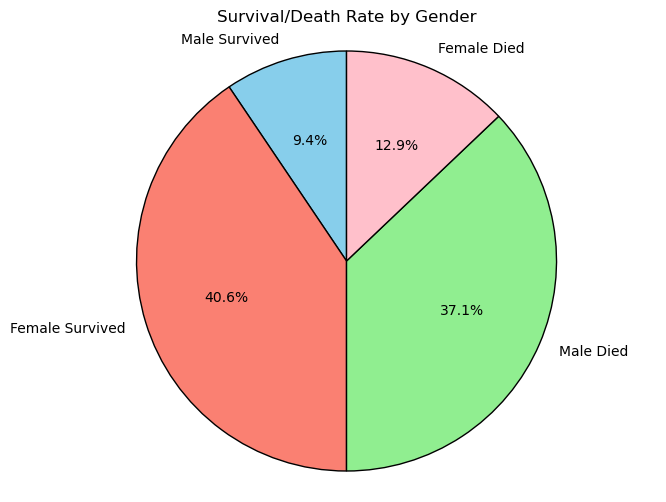

In [87]:
sex_survival = train_data.groupby('Sex')['Survived'].value_counts().unstack().fillna(0)


male_survival_rate = sex_survival.loc[1, 1] / (sex_survival.loc[1, 1] + sex_survival.loc[1, 0])
male_death_rate = sex_survival.loc[1, 0] / (sex_survival.loc[1, 1] + sex_survival.loc[1, 0])

female_survival_rate = sex_survival.loc[0, 1] / (sex_survival.loc[0, 1] + sex_survival.loc[0, 0])
female_death_rate = sex_survival.loc[0, 0] / (sex_survival.loc[0, 1] + sex_survival.loc[0, 0])


labels = ['Male Survived', 'Female Survived','Male Died', 'Female Died']
sizes = [male_survival_rate, male_death_rate, female_survival_rate, female_death_rate]


pit.figure(figsize=(8, 6))
pit.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, 
        colors=['skyblue', 'salmon', 'lightgreen', 'pink'], wedgeprops={'edgecolor': 'black'})
pit.title('Survival/Death Rate by Gender')
pit.axis('equal')  
pit.show()
 

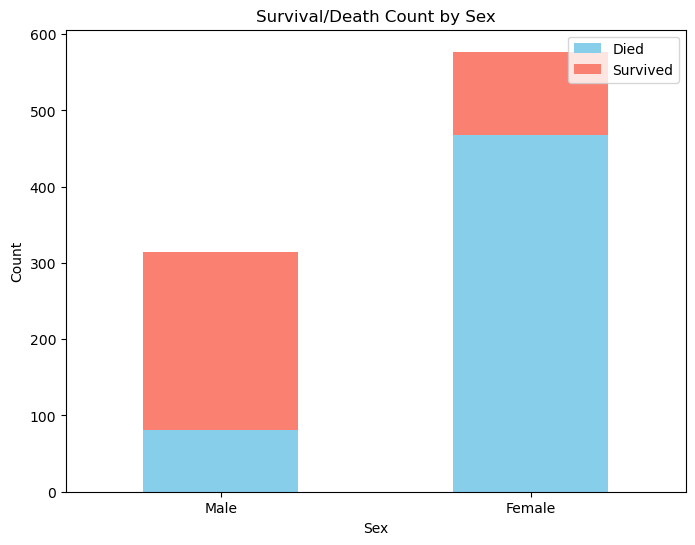

In [88]:
sex_survival.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(8, 6))
pit.title('Survival/Death Count by Sex')
pit.xlabel('Sex')
pit.ylabel('Count')
pit.xticks([1, 0], ['Female', 'Male'], rotation=0)
pit.legend(['Died', 'Survived'], loc='upper right')
pit.show()



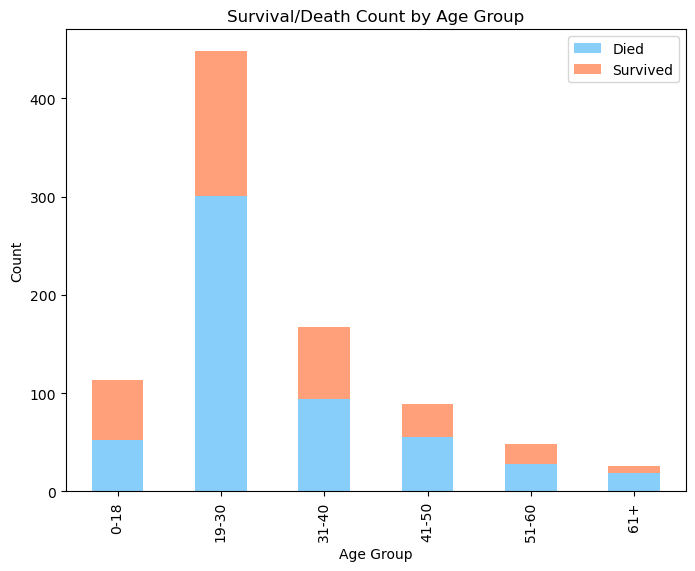

In [89]:
age_survival.plot(kind='bar', stacked=True, color=['lightskyblue', 'lightsalmon'], figsize=(8, 6))
pit.title('Survival/Death Count by Age Group')
pit.xlabel('Age Group')
pit.ylabel('Count')
pit.legend(['Died', 'Survived'], loc='upper right')
pit.show()




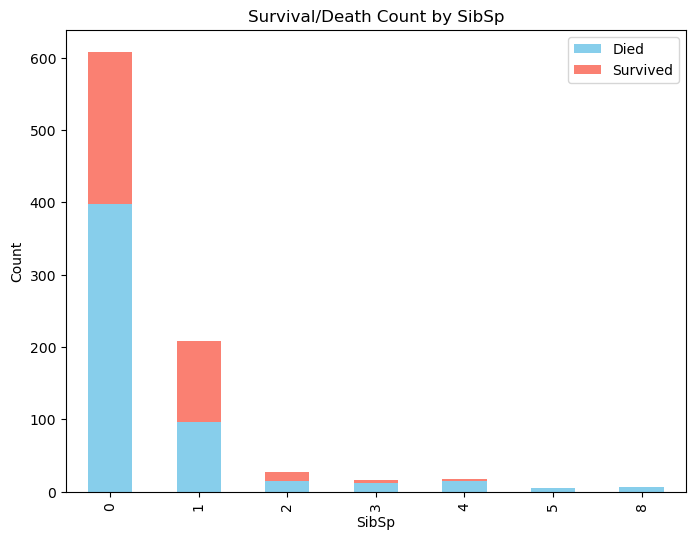

In [90]:
sibsp_survival.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(8, 6))
pit.title('Survival/Death Count by SibSp')
pit.xlabel('SibSp')
pit.ylabel('Count')
pit.legend(['Died', 'Survived'], loc='upper right')
pit.show()



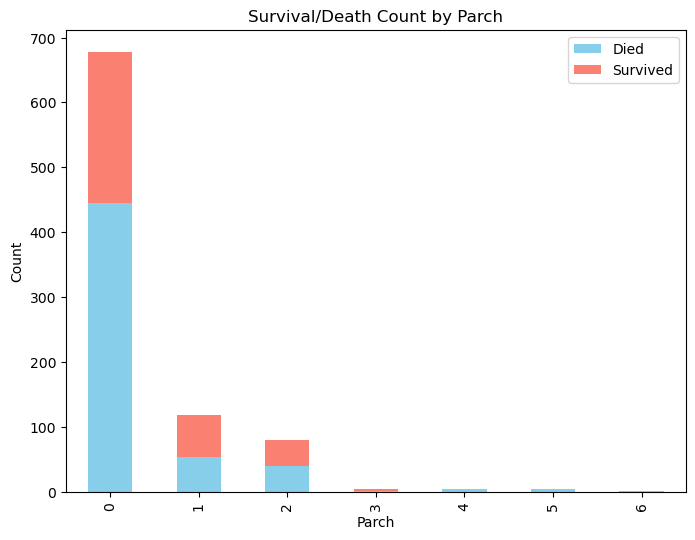

In [91]:
parch_survival.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(8, 6))
pit.title('Survival/Death Count by Parch')
pit.xlabel('Parch')
pit.ylabel('Count')
pit.legend(['Died', 'Survived'], loc='upper right')
pit.show()


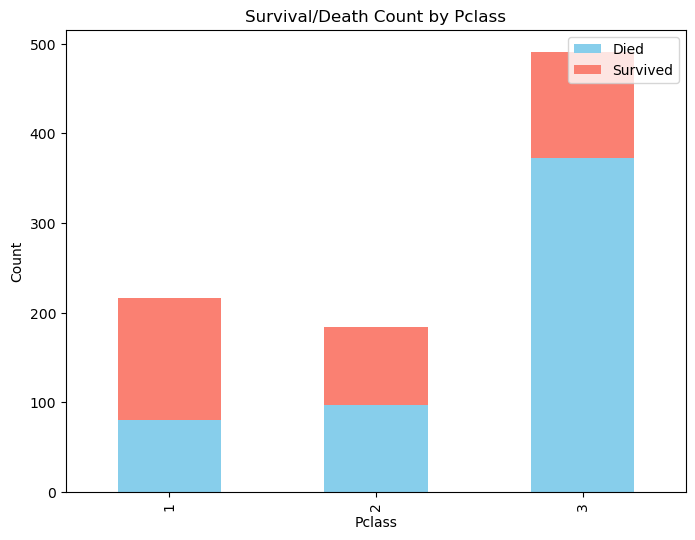

In [92]:

pclass_survival.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(8, 6))
pit.title('Survival/Death Count by Pclass')
pit.xlabel('Pclass')
pit.ylabel('Count')
pit.legend(['Died', 'Survived'], loc='upper right')
pit.show()

In [93]:
y_pred_test = model.predict(X_test_data)


submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'], 
    'Survived': y_pred_test  
})


submission.to_csv('submission.csv', index=False)

print("Submission file has been saved as 'submission.csv'.")

Submission file has been saved as 'submission.csv'.


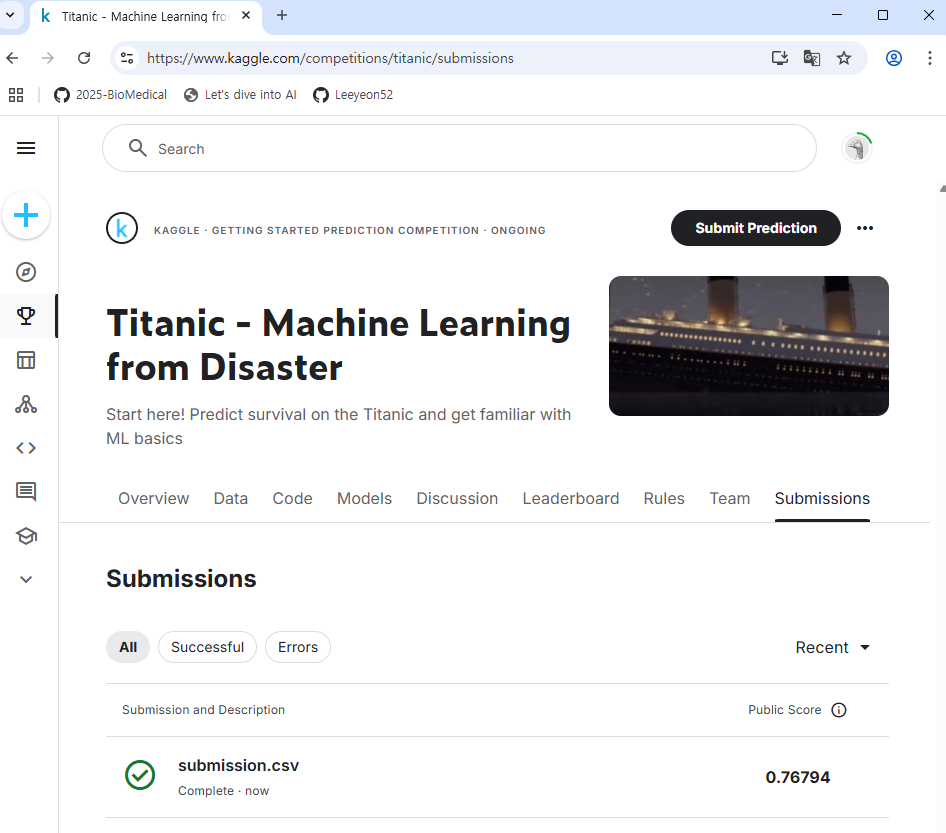

In [95]:
from IPython.display import Image
Image(r'C:\Users\302-15\Desktop\새 폴더\스크린샷 2025-03-25 173438.png')